## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

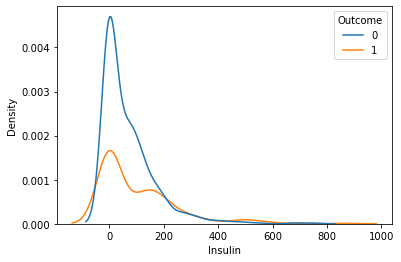

In [8]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
sns.kdeplot(data=df, x='Insulin', hue='Outcome')
plt.show()

In [9]:
# train 세트를 만듭니다.
# train
train = df[df['Insulin']>0]
train.shape

(394, 9)

In [11]:
# test 세트를 만듭니다.
# test
test = df[df['Insulin']==0]
test.shape

(374, 9)


## 학습, 예측에 사용할 컬럼

In [14]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
# 컬럼명을 리스트로 가져오고 사용하지 않을 컬럼을 제거합니다.
# feature_names
feature_names = df.columns.difference(['Insulin'])
feature_names

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Outcome', 'Pregnancies', 'SkinThickness'],
      dtype='object')

## 정답값이자 예측해야 될 값

In [16]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
# label_name
label_name = 'Insulin'
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [17]:
# 학습 세트 만들기 예) 시험의 기출문제
# X_train
X_train = train[feature_names]
X_train.shape

(394, 8)

In [18]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
# y_train
y_train = train[label_name]
y_train.shape

(394,)

In [20]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
# X_test
X_test = test[feature_names]
X_test.shape

(374, 8)

In [22]:
# 예측의 정답값 예) 실전 시험 문제의 정답
# y_test
y_test =  test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [1]:
# model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [25]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

## cross validation 으로 학습 세트의 오차 측정하기

In [30]:
# model_selection의 cross_val_predict 로 cv 로 조각을 나눠 valid 데이터의 학습결과 측정하기
# y_predict

from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)
y_valid_predict[:5]

array([ 25., 182.,  66.,  67., 170.])

In [34]:
# 정답을 정확하게 맞춘 갯수
(y_valid_predict == y_train).sum()

1

In [38]:
# 전체 예측해야 하는 train 데이터의 갯수
X_train.shape[0]

394

### 실제값과 예측값의 차이 시각화 하기

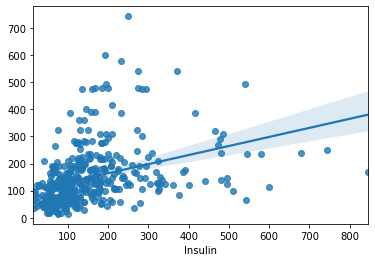

In [42]:
# regplot 으로 결과 값을 비교합니다.
sns.regplot(x=y_train, y=y_valid_predict)
plt.show()

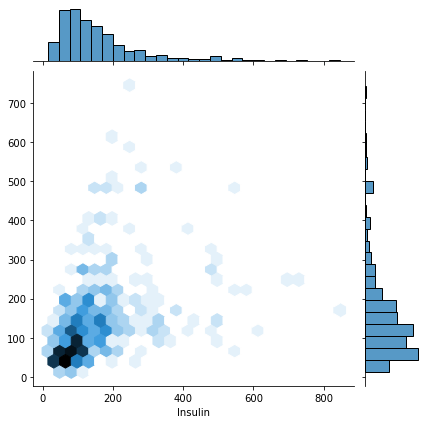

In [44]:
# jointplot 으로 실제값과 예측값을 비교합니다.
sns.jointplot(x=y_train, y=y_valid_predict, kind='hex')
plt.show()

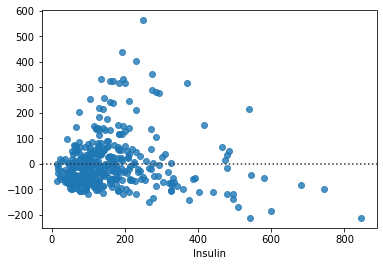

In [46]:
# residplot 으로 잔차(오차값)을 시각화 합니다.
sns.residplot(x=y_train, y=y_valid_predict)
plt.show()

In [48]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score
r2_score(y_train, y_valid_predict)

-0.18573206591555347

In [52]:
# y_train, y_predict 값을 데이터프레임으로 만듭니다.
# df_y
df_y = pd.DataFrame({'y_train' : y_train, 'y_predict':y_valid_predict})
df_y.shape
df_y.head()

,y_train,y_predict
3,94,25.0
4,168,182.0
6,88,66.0
8,543,67.0
13,846,170.0


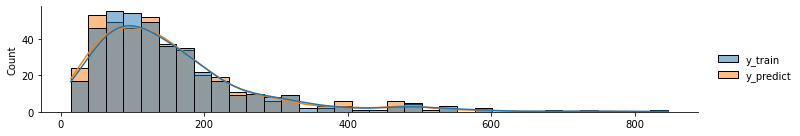

In [60]:
# distplot으로 정답값과 예측값의 분포를 그립니다.
sns.displot(df_y, kde=True, height=2, aspect=5)
plt.show()

## 오차 구하기

In [64]:
# 오차의 절대값 구하기
error = y_train - y_valid_predict

In [65]:
# 오차값에 대한 describe 값을 구합니다.
error.describe()

count    394.000000
mean       5.992386
std      129.197356
min     -495.000000
25%      -54.000000
50%        4.000000
75%       55.000000
max      676.000000
Name: Insulin, dtype: float64

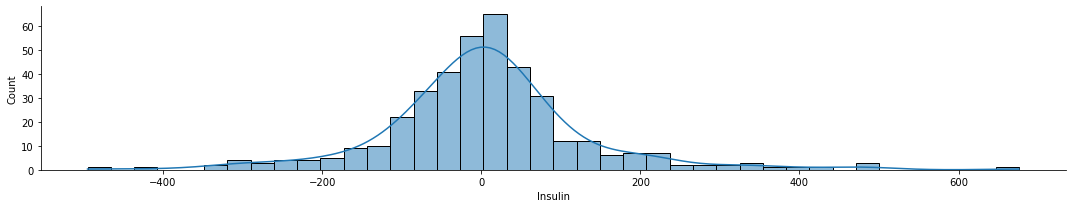

In [69]:
# displot으로 오차값의 분포를 그립니다.
sns.displot(error, kde='True',height=3, aspect=5)
plt.show()

### MAE(Mean Absolute Error)
* [Mean absolute error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [70]:
# 예측값과 실제값의 차이에 대한 절대값의 평균
error = y_train - y_valid_predict
mae = np.abs(error).mean()
mae

86.05329949238579

### MAPE(Mean Absolute Percentage Error)

In [72]:
# (실제값 - 예측값 / 실제값)의 절대값에 대한 평균
error = y_train - y_valid_predict
mape = np.abs(error/y_train).mean()
mape

0.6275003143408974

### MSE(Mean Squared Error)

In [75]:
# 실제값 - 예측값의 차이의 제곱의 평균
# MAE와 비슷해 보이나 제곱을 통해 음수를 양수로 변환함
# 분산과 유사한 공식
error = y_train - y_valid_predict
mse = np.square(error).mean()
mse

16685.5

### RMSE(Root Mean Squared Error)

In [78]:
# RMSE
error = y_train - y_valid_predict
rmse = np.sqrt(np.square(error).mean())
rmse

129.1723654656831

## 트리 알고리즘 분석하기
* 피처의 중요도를 구합니다.

In [81]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.15031235, 0.12805145, 0.0604546 , 0.15183568, 0.40399372,
       0.01135473, 0.03043899, 0.06355847])

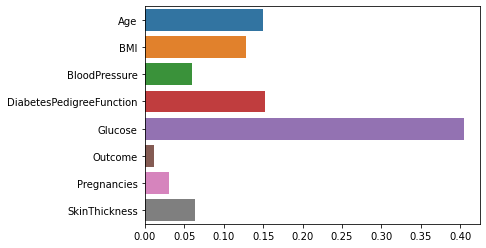

In [84]:
# 피처의 중요도 시각화 하기
sns.barplot(x = model.feature_importances_, y=feature_names)
plt.show()

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [85]:
# y_test
y_predict = model.predict(X_test)

### 실제값과 예측값 비교하기

In [87]:
# train 데이터셋의 Outcome 값에 따라 Insulin 수치 describe 로 비교해 보기
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [91]:
# test 의 Insulin 값을 y_test 에 반영합니다.
test['Insulin'] = y_predict

<ipython-input-91-99c7433e4337>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Insulin'] = y_predict


In [92]:
# test 데이터셋의 Outcome 값에 따라 Insulin 수치 describe 로 비교해 보기
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,140.381356,110.232900,15.0,66.0,99.5,170.0,600.0
1,138.0,212.086957,133.671811,36.0,110.0,174.0,280.0,680.0
